<a href="https://colab.research.google.com/github/kimqkr4/submission/blob/main/homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: MSE = 5.6957
Epoch 10: MSE = 3.3953
Epoch 20: MSE = 2.2963
Epoch 30: MSE = 1.7529
Epoch 40: MSE = 1.4793


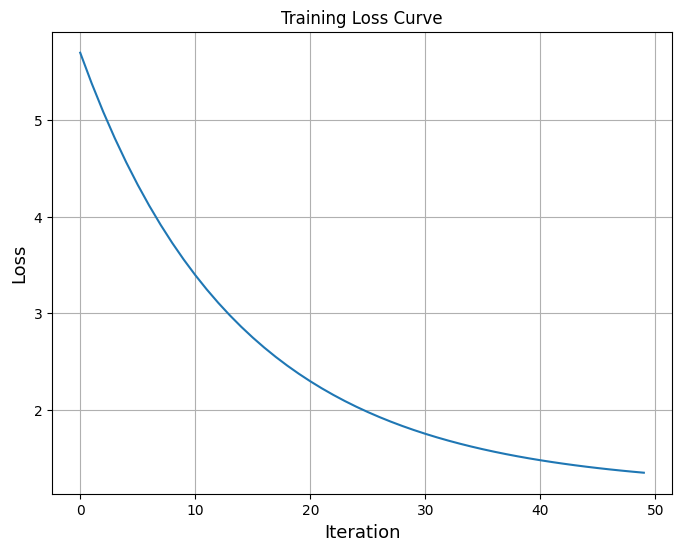

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
samples = 1000
x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)
X = np.column_stack((x1, x2))
y = 2 * x1 + 3 * x2 - 1
y = y.reshape(-1, 1)

# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# 초기 설정
lr = 0.01
epochs = 50

input_size = 2
hidden_size = 3
output_size = 1

# 가중치 초기화
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# 손실 기록
mse_record = []

# 학습
for epoch in range(epochs):
    # 순전파
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = z2  # 회귀이므로 출력에 활성화 함수 없음

    # 손실 계산 (MSE)
    mse = np.mean((y - y_pred) ** 2)
    mse_record.append(mse)

    # 역전파
    dL_dy = 2 * (y_pred - y) / y.shape[0]
    dW2 = np.dot(a1.T, dL_dy)
    db2 = np.sum(dL_dy, axis=0, keepdims=True)

    da1 = np.dot(dL_dy, W2.T)
    dz1 = da1 * sigmoid_deriv(z1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # 가중치 업데이트
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # 출력 주기
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: MSE = {mse:.4f}")

# 그래프 시각화
plt.figure(figsize=(8, 6))
plt.plot(np.arange(epochs), mse_record)
plt.xlabel('Iteration', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()
